In [1]:
from pgmpy.models import BayesianModel
import pandas as pd
import itertools
import scipy
from scipy import io
import numpy as np

Load data and graph that was learnt :

In [2]:
R = np.loadtxt('expressions.txt')
test = pd.DataFrame(data=np.transpose(R))
cols = [str(x) for x in test.columns.tolist()]
test = pd.DataFrame(data=np.transpose(R),columns = cols)
read_concise = np.load('concise_final.npy').item()
read_parent = np.load('parents_final.npy').item()

Define a network and export the data for plotting:

In [3]:
G = BayesianModel()

G.add_nodes_from(test.columns)

pairs = list(itertools.combinations(test.columns, 2))

for X in test.columns :
        Y = read_parent[X]
        if not Y:
            continue
        else:
            G.add_edges_from([(y,X) for y in Y])

In [4]:
A  = G.adjacency_list()

In [5]:
adj = np.zeros((len(A),len(A)))
Adj = np.zeros((len(A),len(A)))

for i in range(0,len(A)):
    node = A[i]
    for j in range(0,len(node)):
        elem = int(node[j])
        adj[i][elem] = 1
        Adj[i][elem] = A[i][j]  

In [6]:
a_list = {}
a_list['A'] = A
a_list['adj'] = adj
a_list['Adj'] = Adj

In [7]:
scipy.io.savemat('a_list',a_list,appendmat=True, format='5', long_field_names=True, do_compression=False, oned_as='column') 

Marginalize the additional nodes:

In [8]:
labels = test.columns
G.remove_node(labels[0])
G.remove_node(labels[6])
G.remove_node(labels[7])
G.remove_node(labels[8])
G.remove_node(labels[9])
G.remove_node(labels[10])
G.remove_node(labels[12])
G.remove_node(labels[13])
G.remove_node(labels[16])
G.remove_node(labels[17])
G.remove_node(labels[18])
G.remove_node(labels[20])
G.remove_node(labels[23])
G.remove_node(labels[25])
G.remove_node(labels[26])
G.remove_node(labels[27])
G.remove_node(labels[29])
G.remove_node(labels[30])
G.remove_node(labels[31])
G.remove_node(labels[37])
G.remove_node(labels[46])
G.remove_node(labels[50])
G.remove_node(labels[51])
G.remove_node(labels[53])
G.remove_node(labels[55])
G.remove_node(labels[61])
G.remove_node(labels[62])
G.remove_node(labels[63])
G.remove_node(labels[65])
G.remove_node(labels[67])
G.remove_node(labels[68])
G.remove_node(labels[71])
G.remove_node(labels[72])

In [9]:
B = G.adjacency_list()

In [10]:
C = []
for element in A:
    C.append([])

In [11]:
# Since the original network had 77 nodes, this is sort of a change of origin equivalent for the adjacency list
C[1]=B[0]
C[2]=B[1]
C[3]=B[2]
C[4]=B[3]
C[5]=B[4]
C[11]=B[5]
C[14]=B[6]
C[15]=B[7]
C[19]=B[8]
C[21]=B[9]
C[22]=B[10]
C[24]=B[11]
C[28]=B[12]
C[32]=B[13]
C[33]=B[14]
C[34]=B[15]
C[35]=B[16]
C[36]=B[17]
C[38]=B[18]
C[39]=B[19]
C[40]=B[20]
C[41]=B[21]
C[42]=B[22]
C[43]=B[23]
C[44]=B[24]
C[45]=B[25]
C[47]=B[26]
C[48]=B[27]
C[49]=B[28]
C[52]=B[29]
C[54]=B[30]
C[56]=B[31]
C[57]=B[32]
C[58]=B[33]
C[59]=B[34]
C[60]=B[35]
C[64]=B[36]
C[66]=B[37]
C[69]=B[38]
C[70]=B[39]
C[73]=B[40]
C[74]=B[41]
C[75]=B[42]
C[76]=B[43]

Save the adjacency list of the structure that was learnt by the program:

In [12]:
adj = np.zeros((len(C),len(C)))
Adj = np.zeros((len(C),len(C)))

for i in range(0,len(C)):
    node = C[i]
    for j in range(0,len(node)):
        elem = int(node[j])
        adj[i][elem] = 1
        Adj[i][elem] = C[i][j]  

adj_test = adj

In [13]:
a_list = {}
a_list['A'] = C
a_list['adj'] = adj
a_list['Adj'] = Adj

In [14]:
scipy.io.savemat('a_list_new',a_list,appendmat=True, format='5', long_field_names=True, do_compression=False, oned_as='column') 

Define the truth from the KEGG database :

In [15]:
#truth = [[1,28,43],[],[],[18],[2],[],[],[],[5,42],[10,24],[12,37],[4],[29],[14,15],[16,12,37,38],
       #  [17,12,37,38],[31],[],[23],[25],[25],[19,20],[25],[26,1,39],[12,37],[],[42],[],[1,39],
       #  [31,21,3],[0],[33,3],[33],[30],[],[33,0],[],[29],[],[8],[22,4],[22,36,4],[6,7],[]]

In [16]:
truth = [[2,49,76],[],[],[38],[3],[],[],[],[11,75],[22,44],[28,66],[5],[52],[33,34],[35,28,66,69],[36,28,66,69],
[56],[],[43],[45],[45],[39,40],[45],[47,70,2],[28,66],[],[75],[],[2,70],[56,41,4],[1],[58,4],[58],[54],[],[58,1],
[],[52],[],[19],[42,5],[42,64,5],[14,15],[]]

In [17]:
C = []
for element in A:
    C.append([])

In [18]:
C[1]=truth[0]
C[2]=truth[1]
C[3]=truth[2]
C[4]=truth[3]
C[5]=truth[4]
C[11]=truth[5]
C[14]=truth[6]
C[15]=truth[7]
C[19]=truth[8]
C[21]=truth[9]
C[22]=truth[10]
C[24]=truth[11]
C[28]=truth[12]
C[32]=truth[13]
C[33]=truth[14]
C[34]=truth[15]
C[35]=truth[16]
C[36]=truth[17]
C[38]=truth[18]
C[39]=truth[19]
C[40]=truth[20]
C[41]=truth[21]
C[42]=truth[22]
C[43]=truth[23]
C[44]=truth[24]
C[45]=truth[25]
C[47]=truth[26]
C[48]=truth[27]
C[49]=truth[28]
C[52]=truth[29]
C[54]=truth[30]
C[56]=truth[31]
C[57]=truth[32]
C[58]=truth[33]
C[59]=truth[34]
C[60]=truth[35]
C[64]=truth[36]
C[66]=truth[37]
C[69]=truth[38]
C[70]=truth[39]
C[73]=truth[40]
C[74]=truth[41]
C[75]=truth[42]
C[76]=truth[43]

In [19]:
adj = np.zeros((len(C),len(C)))
Adj = np.zeros((len(C),len(C)))

for i in range(0,len(C)):
    node = C[i]
    for j in range(0,len(node)):
        elem = int(node[j])
        adj[i][elem] = 1
        Adj[i][elem] = C[i][j] 

adj_true = adj

In [20]:
a_list = {}
a_list['A'] = truth
a_list['adj'] = adj
a_list['Adj'] = Adj

In [21]:
scipy.io.savemat('a_list_truth',a_list,appendmat=True, format='5', long_field_names=True, do_compression=False, oned_as='column') 

# Validation

In [22]:
true = np.asarray(adj_true).reshape(-1)
pred = np.asarray(adj_test).reshape(-1)

[ 0.         0.0030654  1.       ]
[ 0.  0.  1.]
[ 2.  1.  0.]


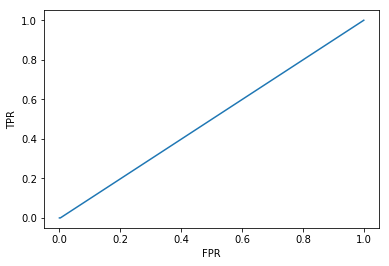

In [23]:
from sklearn import metrics
import matplotlib.pyplot as plt

fp, tp, thresholds = metrics.roc_curve(true, pred,drop_intermediate=False)

print(fp)
print(tp)
print(thresholds)

plt.plot(fp,tp)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [24]:
true_skeleton = {}
true_skel = {}

for i in range(0,len(adj_true)):
    I = str(i)
    for j in range(0,len(adj_true)):
        J = str(j)
        true_skeleton[i,j] = adj_true[i][j]
        true_skel[I,J] =  adj_true[i][j]
        
test_skeleton = {}
test_skel = {}

for i in range(0,len(adj_test)):
    I = str(i)
    for j in range(0,len(adj_test)):
        J = str(j)
        test_skeleton[i,j] = adj_test[i][j]
        test_skel[I,J] =  adj_test[i][j]

In [25]:
tp = 0
fp = 0
fn = 0
tn = 0

for (X,Y) in true_skeleton:
    if true_skeleton[X,Y] == 1 and test_skeleton[X,Y] == 1:
        tp += 1
    if true_skeleton[X,Y] == 1 and test_skeleton[X,Y] == 0:
        fn += 1
    if true_skeleton[X,Y] == 0 and test_skeleton[X,Y] == 0:
        tn += 1
    if true_skeleton[X,Y] == 0 and test_skeleton[X,Y]== 1:
        fp += 1
print('tp',tp,'fp',fp,'tn',tn,'fn',fn)

('tp', 0, 'fp', 18, 'tn', 5854, 'fn', 57)


In [26]:
np.save('true_skeleton.npy', true_skel) 
np.save('test_skeleton.npy', test_skel) 